# Task 2:Data Science

# Iris Flower Classification using Machine Learning(Decision Tree Classifier)

# By -- Rahul Sharma

# Intermediate Level Task

Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any 
new data to this classifier, it would be able to predict the right,class accordingly.

In [1]:
#Importing required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Now importing the dataset
df=pd.read_csv('iris.csv')

In [3]:
# want to check bottom 5 rows
df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#checking the shape of dataset
df.shape

(150, 5)

# There are 150 rows and 5 columns in the dataset

In [5]:
#checking for null values
df.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [6]:
#checking the datatype of columns
df.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object

In [7]:
#checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Viewing the statistical description of the dataset.

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# Visualizing the dataset

<AxesSubplot:>

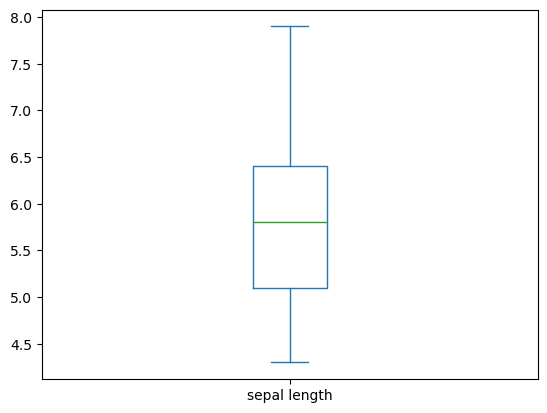

In [9]:
df['sepal length'].plot.box()

<AxesSubplot:>

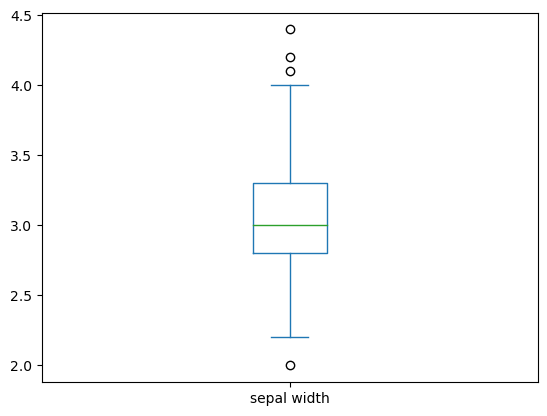

In [10]:
df['sepal width'].plot.box()

<AxesSubplot:>

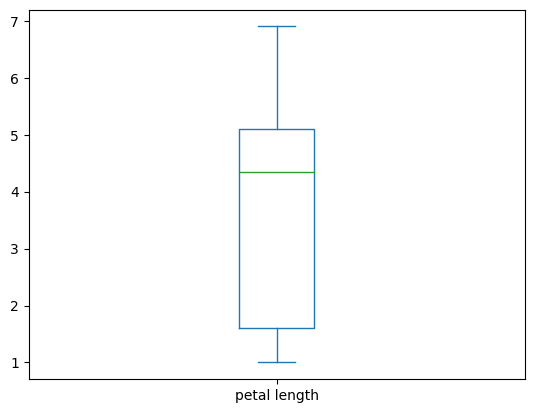

In [11]:
df['petal length'].plot.box()

<AxesSubplot:>

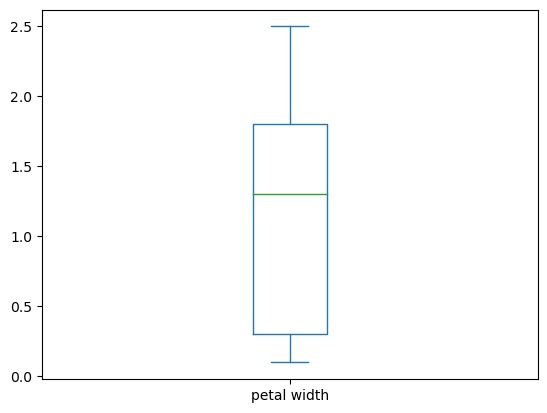

In [12]:
df['petal width'].plot.box()

In [13]:
#checking the correlation
df.corr()

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

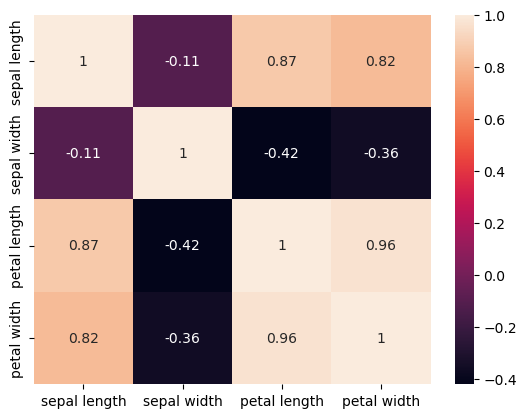

In [14]:
#Visualising it using heatmap
sns.heatmap(df.corr(),annot=True)

In [15]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Separting the target and feature variables

In [16]:
x=df.drop('class',axis=1)

In [17]:
y=df['class']

In [18]:
x

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std = StandardScaler()
x = std.fit_transform(x)

In [22]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Creating a train test split

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [24]:
x_train

array([[-1.02184904e+00, -2.43898725e+00, -1.47092621e-01,
        -2.61192967e-01],
       [ 7.95669016e-01, -1.24957601e-01,  9.90221459e-01,
         7.90590793e-01],
       [ 1.03800476e+00,  5.69251294e-01,  1.10395287e+00,
         1.71090158e+00],
       [ 1.89829664e-01, -1.97618132e+00,  7.05892939e-01,
         3.96171883e-01],
       [ 1.03800476e+00, -1.28197243e+00,  1.16081857e+00,
         7.90590793e-01],
       [-2.94841818e-01, -1.28197243e+00,  8.03701950e-02,
        -1.29719997e-01],
       [ 2.24968346e+00, -1.24957601e-01,  1.33141568e+00,
         1.44795564e+00],
       [ 5.53333275e-01,  5.69251294e-01,  5.35295827e-01,
         5.27644853e-01],
       [-4.16009689e-01, -1.51337539e+00,  2.35044910e-02,
        -1.29719997e-01],
       [ 5.53333275e-01, -8.19166497e-01,  6.49027235e-01,
         7.90590793e-01],
       [ 5.53333275e-01, -5.87763531e-01,  7.62758643e-01,
         3.96171883e-01],
       [-1.14301691e+00, -1.28197243e+00,  4.21564419e-01,
      

In [25]:
x_test

array([[-5.25060772e-02, -5.87763531e-01,  7.62758643e-01,
         1.57942861e+00],
       [ 1.89829664e-01, -1.97618132e+00,  1.37235899e-01,
        -2.61192967e-01],
       [-4.16009689e-01,  2.65187798e+00, -1.34127240e+00,
        -1.31297673e+00],
       [ 1.76501198e+00, -3.56360566e-01,  1.44514709e+00,
         7.90590793e-01],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [ 5.53333275e-01,  5.69251294e-01,  1.27454998e+00,
         1.71090158e+00],
       [-1.02184904e+00,  1.03205722e+00, -1.39813811e+00,
        -1.18150376e+00],
       [ 1.03800476e+00,  1.06445364e-01,  5.35295827e-01,
         3.96171883e-01],
       [ 1.15917263e+00, -5.87763531e-01,  5.92161531e-01,
         2.64698913e-01],
       [ 3.10997534e-01, -5.87763531e-01,  1.37235899e-01,
         1.33225943e-01],
       [ 3.10997534e-01, -1.05056946e+00,  1.04708716e+00,
         2.64698913e-01],
       [ 6.74501145e-01,  3.37848329e-01,  4.21564419e-01,
      

In [26]:
y_train

60     Iris-versicolor
116     Iris-virginica
144     Iris-virginica
119     Iris-virginica
108     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: class, Length: 105, dtype: object

In [27]:
y_test

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
59     Iris-versicolor
18         Iris-setosa
83     Iris-versicolor
61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
43         

# Decision Tree Classifier

In [28]:
from sklearn.tree import   DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [29]:
dtc=DecisionTreeClassifier()

In [30]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

# Prediction

In [31]:
preddtc=dtc.predict(x_test)

In [32]:
print(preddtc)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


# Model Evaluation

In [33]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [34]:
print('The accuracy_score is :',accuracy_score(preddtc,y_test))
print('The classification report is :',classification_report(preddtc,y_test))

The accuracy_score is : 0.9777777777777777
The classification report is :                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      1.00      0.97        17
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [35]:
cm=('The confusion matrix is :',confusion_matrix(preddtc,y_test))

In [36]:
cm

('The confusion matrix is :',
 array([[16,  0,  0],
        [ 0, 17,  0],
        [ 0,  1, 11]], dtype=int64))

# Data visualization for the Model

In [39]:
col = df.columns.tolist()
print(col)

['sepal length', 'sepal width', 'petal length', 'petal width', 'class']


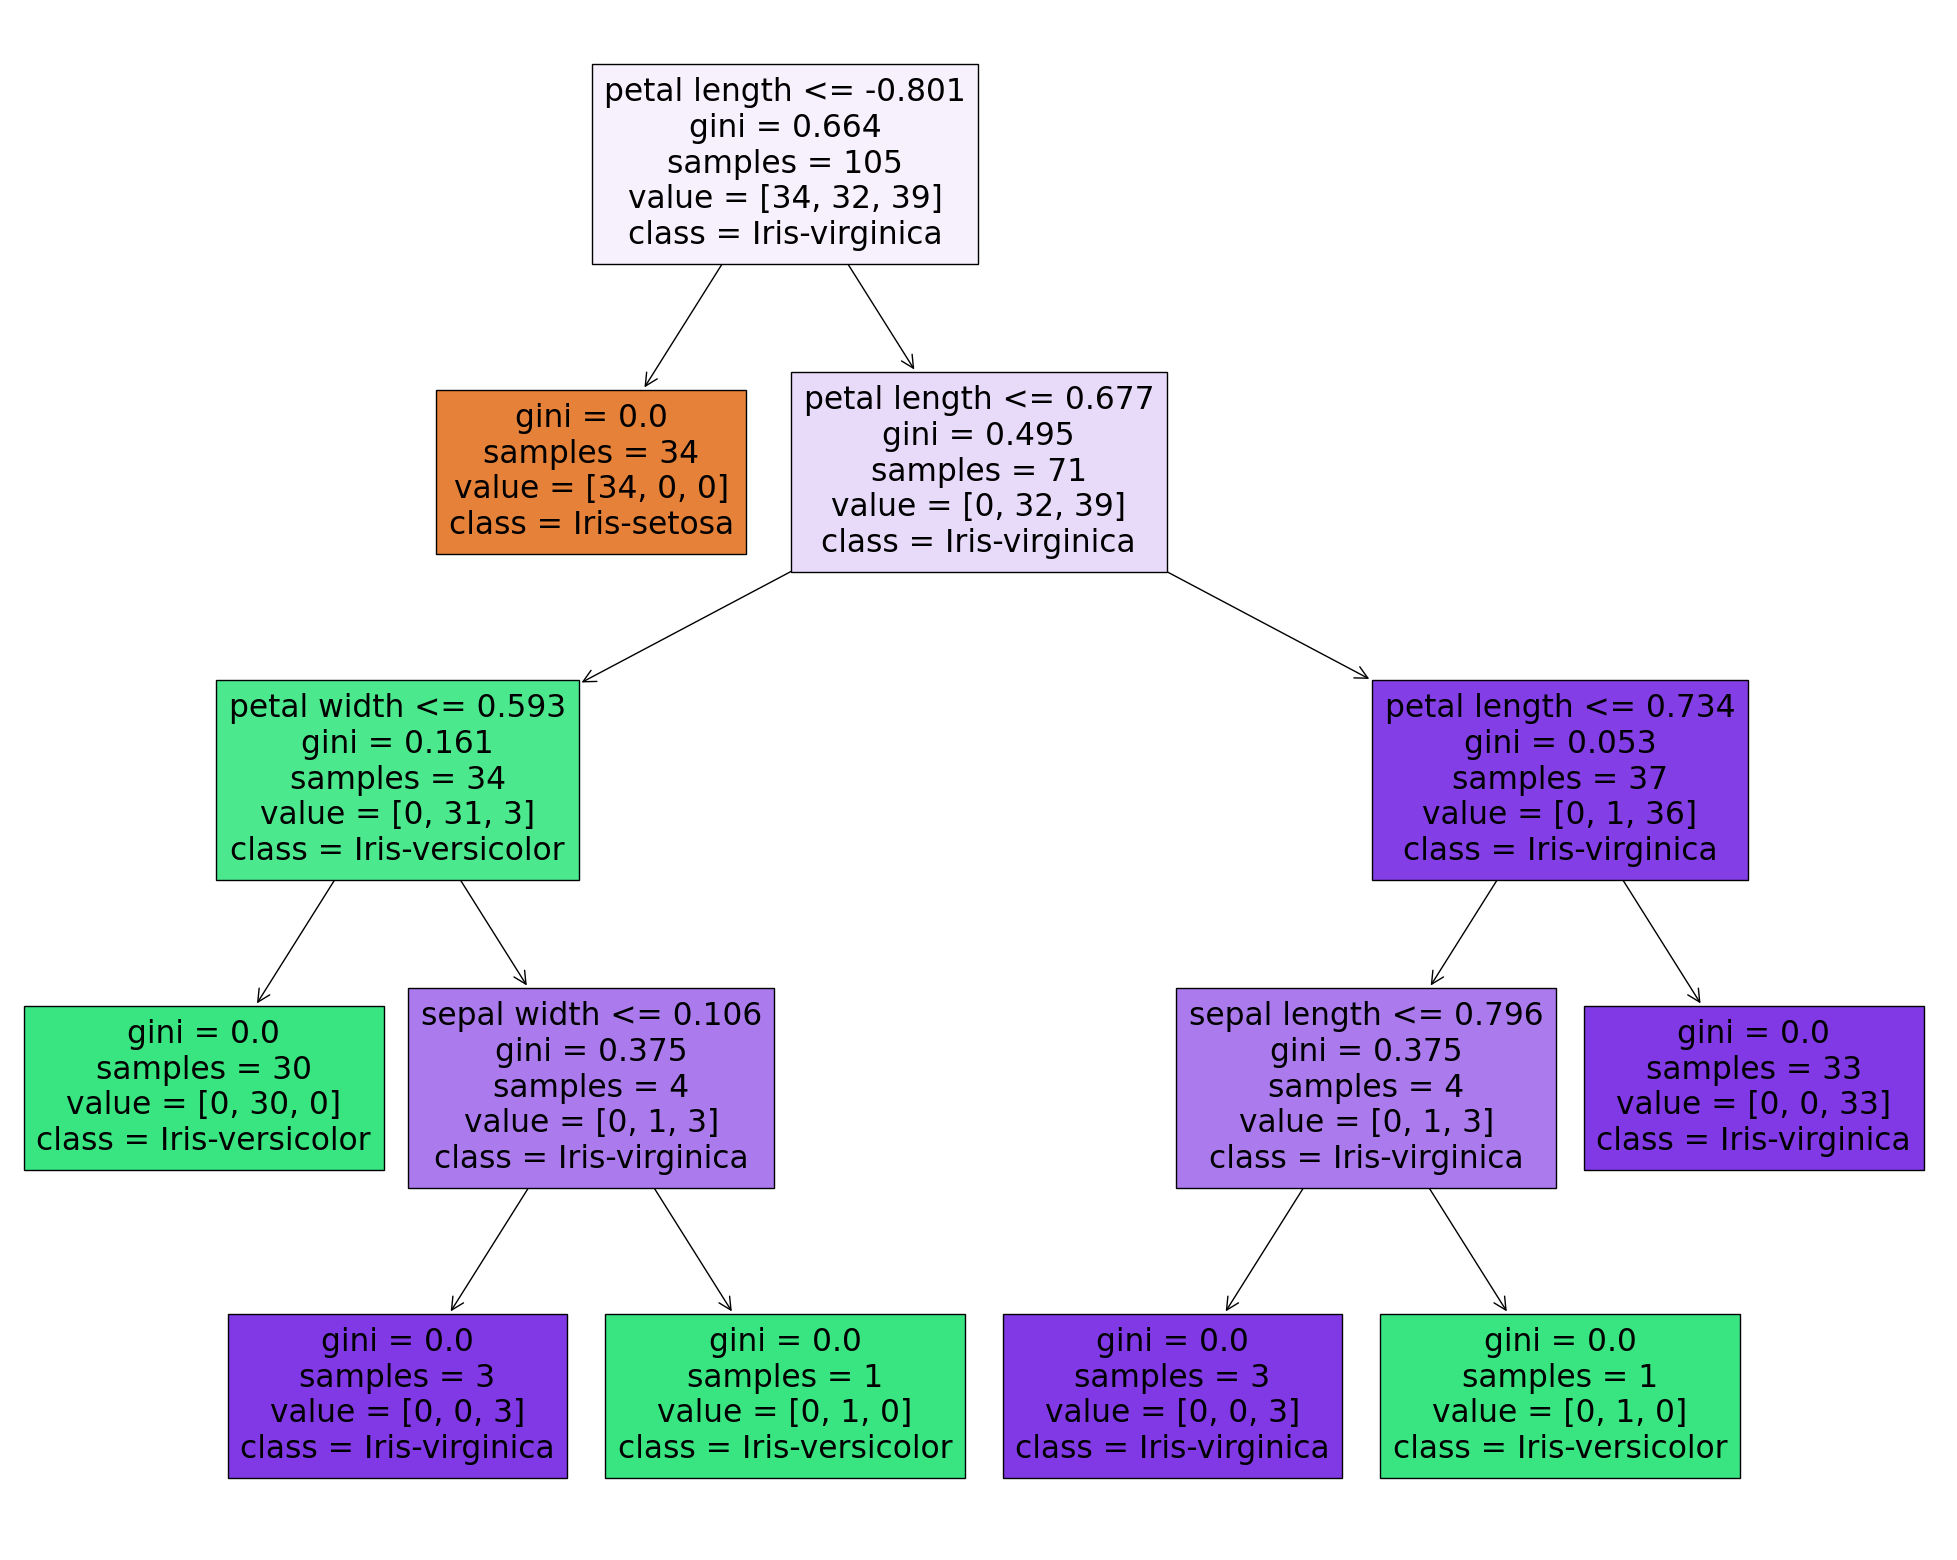

In [40]:
from sklearn.tree import plot_tree
     

fig = plt.figure(figsize=(25, 20))
tree_distrbtn = plot_tree(dtc, feature_names = col, class_names = lst, filled = True)